In [92]:
## EDA and Hypothesis Testing for Insurance Claims Data 

In [3]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [93]:
## importing the required librariers
import os
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') 

In [94]:
## reading the dataset
os.chdir('C:\\Users\\Lenovo\\Desktop\\COMPLETE FOLDER\\PYTHON FOLDER\\python casestudies left')
claim_df=pd.read_csv('claims.csv')
cust_df= pd.read_csv('cust_demographics.csv')

In [95]:
claim_df.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No


In [96]:
cust_df.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


In [97]:
## merging/ joining the dataframes
mergedf=pd.merge(left=cust_df,right=claim_df,how='inner',left_on='CUST_ID',right_on='customer_id')

In [98]:
mergedf.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No


In [99]:
# knowing the data types
mergedf.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [100]:
##mergedf['gender'] = mergedf['gender'].map({'Male': 1, 'Female': 0})

In [101]:
mergedf.shape

(1085, 16)

In [102]:
# formatting the datatypes
mergedf['DateOfBirth']=pd.to_datetime(mergedf['DateOfBirth'],format='mixed')
mergedf['claim_date']=pd.to_datetime(mergedf['claim_date'])

In [103]:
# formatting the claim amount into the correct datatype
mergedf['claim_amount']=mergedf['claim_amount'].str.replace('$','').astype('float')

In [104]:
# dropping the column
mergedf.drop(columns= ['customer_id'],inplace= True)

In [105]:
# looking for duplicates
mergedf.duplicated(subset='CUST_ID').sum()

7

In [106]:
#dropping the duplicates
mergedf.drop_duplicates(subset=['CUST_ID'], keep='first', inplace=True)

In [107]:
mergedf = mergedf.sort_values(by='claim_date', ascending=False).drop_duplicates(subset='CUST_ID', keep='first')

In [108]:
# looking for missing values

In [109]:
mergedf.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [110]:
# filling the missing values with the mean
mergedf['claim_amount'].fillna(mergedf['claim_amount'].mean(),inplace=True)
mergedf['total_policy_claims'].fillna(mergedf['total_policy_claims'].mean(),inplace=True)

In [111]:
#Calculate the age of customers in years. Based on the age, categorize the
#customers according to the below criteria
#Children < 18
#Youth 18-30
#Adult 30-60
#Senior > 60


In [112]:
mergedf['DateOfBirth']

941    1977-04-28
226    2074-11-21
286    2067-09-08
751    1996-01-05
1055   2068-04-22
          ...    
177    1985-11-16
120    2065-01-10
181    1994-07-24
905    1993-08-13
231    1999-08-05
Name: DateOfBirth, Length: 1078, dtype: datetime64[ns]

In [113]:
#calculated the age
mergedf['Age']=mergedf['claim_date'].dt.year-mergedf['DateOfBirth'].dt.year

In [114]:
mergedf.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,41


In [115]:
## What is the average amount claimed by the customers from various segments?

In [116]:
mergedf.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64

In [117]:
#What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [118]:
mergedf.groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.592525e+05
Driver error          3.517208e+06
Natural causes        1.384761e+06
Other causes          4.222545e+06
Other driver error    3.559431e+06
Name: claim_amount, dtype: float64

In [119]:
cutoff_date = pd.to_datetime('2018-10-01') - pd.Timedelta(days=20)
filtered_df = mergedf[mergedf['claim_date'] <= cutoff_date]
filtered_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age
1067,78064067,Female,1999-11-04,MS,713-457-9846,Gold,50845008,Natural causes,2018-09-06,Auto,No,Material only,1090.0,5.0,No,19
956,75884493,Female,2069-07-27,VT,196-435-7259,Gold,3110549,Other driver error,2018-09-06,Auto,Yes,Material and injury,35310.0,6.0,No,-51
482,80701300,Female,1994-07-28,MS,593-423-4839,Silver,15267466,Other causes,2018-09-06,Auto,Yes,Material only,1150.0,2.0,Yes,24
580,76339681,Female,1990-03-08,MI,843-529-3256,Platinum,70575561,Crime,2018-09-06,Home,Unknown,Material only,1910.0,1.0,No,28
542,9600820,Female,2062-02-19,MN,356-384-4378,Gold,41574198,Other causes,2018-09-06,Auto,Unknown,Injury only,29830.0,1.0,No,-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,32
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,-48
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,23
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,24


In [120]:
#10. How many adults from TX, DE and AK claimed insurance for driver
#related issues and causes? 

In [121]:
mergedf.groupby(['State','incident_cause']).agg({'CUST_ID':'count'})

CUST_ID
State incident_cause             
AK    Driver error              6
      Natural causes            4
      Other causes              5
      Other driver error        4
AL    Crime                     2
...                           ...
WY    Crime                     1
      Driver error              6
      Natural causes            3
      Other causes              3
      Other driver error        4

[242 rows x 1 columns]

In [122]:
mergedf.head(2)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,41
226,17682060,Female,2074-11-21,NV,186-195-3465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,-56


In [123]:
mergedf['gender'].value_counts()

gender
Male      551
Female    527
Name: count, dtype: int64

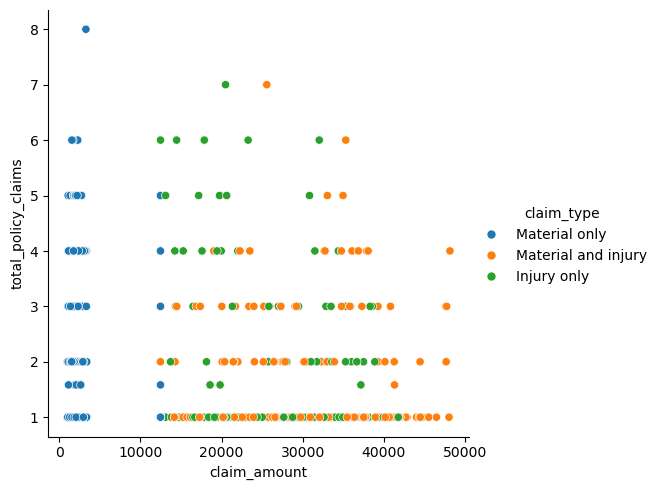

In [124]:
sns.relplot(x='claim_amount',y='total_policy_claims',hue='claim_type',data=mergedf)

In [125]:
#11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on
#the pie chart.


In [126]:
grouped_df=mergedf.groupby(by=['gender','Segment'])['claim_amount'].sum().reset_index()


In [127]:
labels = grouped_df['gender'].astype(str) + ' - ' + grouped_df['Segment'].astype(str)
# Creating explode values to highlight the largest segment
explode = [0.1 if value == grouped_df['claim_amount'].max() else 0 for value in grouped_df['claim_amount']]


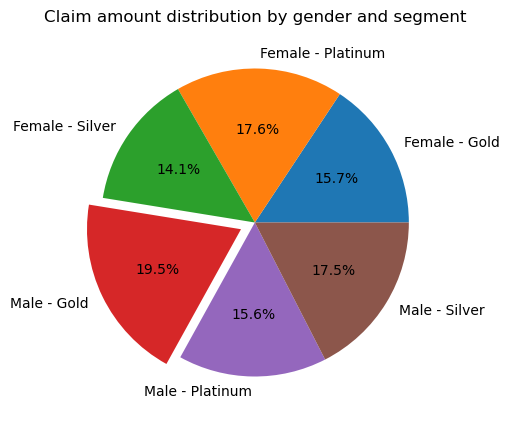

In [128]:
plt.figure(figsize=(5,5))
plt.pie(grouped_df['claim_amount'],labels=labels,autopct='%1.1f%%',explode=explode)
plt.title('Claim amount distribution by gender and segment')
plt.show()

In [129]:
#12. Among males and females, which gender had claimed the most for anytype of driver related issues? E.g. This metric can be compared using a bar chart


In [130]:
driver_claims=mergedf[mergedf['incident_cause'].str.contains('driver')]
driver_claims.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age
322,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,2.0,No,32


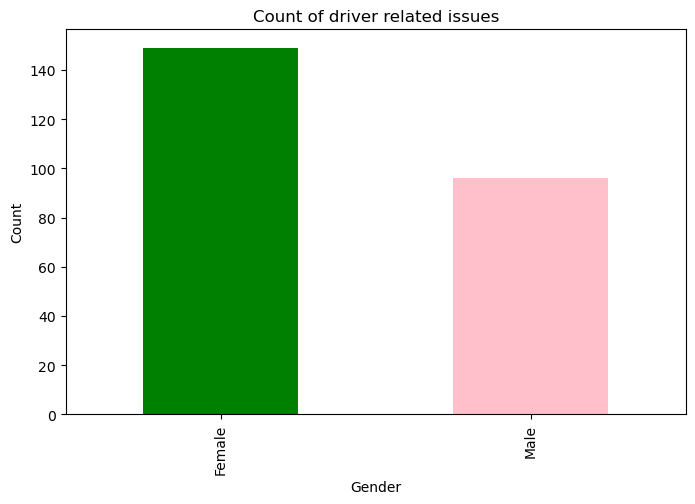

In [131]:
gender_claims=driver_claims['gender'].value_counts()

## plotting the bar graph
plt.figure(figsize=(8,5))
gender_claims.plot(kind='bar',color=['green','pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of driver related issues')
plt.show()

## Hence, females had more driver related issues for which they had claimed for insurance.

In [132]:
#13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

Text(0.5, 1.0, 'Boxplot of age without removing negative values')

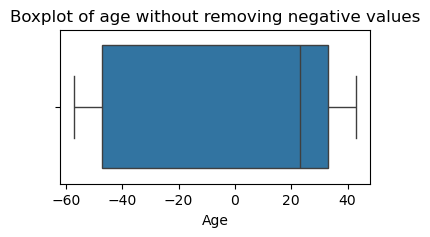

In [133]:
plt.figure(figsize=(4,2))
sns.boxplot(x=mergedf['Age'])
plt.xlabel('Age')
plt.title('Boxplot of age without removing negative values')

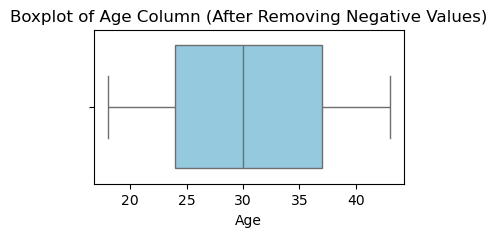

In [134]:
mergedf = mergedf[mergedf['Age'] >= 0]
plt.figure(figsize=( 4,2))
sns.boxplot(x=mergedf['Age'], color='skyblue')

plt.xlabel("Age")
plt.title("Boxplot of Age Column (After Removing Negative Values)")
plt.show()

In [135]:
mergedf['Agegroup']=pd.cut(mergedf['Age'],bins = [18, 25, 30, 35, 40, 43],labels = ["18-25", "26-30", "31-35", "36-40", "41-43"])
mergedf.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Age,Agegroup
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,41,41-43


In [136]:
fraudulent_df= mergedf[mergedf['fraudulent']=='Yes']

In [137]:
fraud_count = fraudulent_df["Agegroup"].value_counts().sort_index()
fraud_count

Agegroup
18-25    36
26-30    32
31-35    29
36-40    29
41-43    19
Name: count, dtype: int64

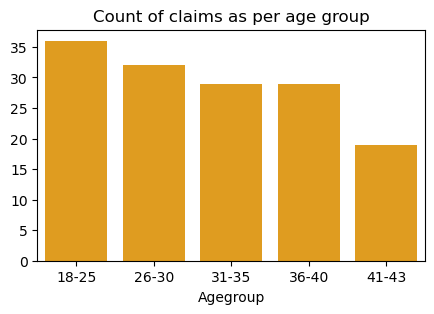

In [138]:
plt.figure(figsize=(5,3))
sns.barplot(x=fraud_count.index, y=fraud_count.values,color='orange')
plt.ylabel= 'Number of claims'
plt.title('Count of claims as per age group')
plt.show()
## Hence, age group of 18-25 had maximum fraudulent claims

In [139]:
#14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a 
#chronological order not alphabetical order. 

In [140]:
mergedf['Month_Num'] = mergedf['claim_date'].dt.month
mergedf['Month_Name'] = mergedf['claim_date'].dt.strftime('%B')

# Aggregate total claim amount by month
monthly_claims = mergedf.groupby(['Month_Num', 'Month_Name'])['claim_amount'].sum().reset_index()
monthly_claims = monthly_claims.sort_values('Month_Num')

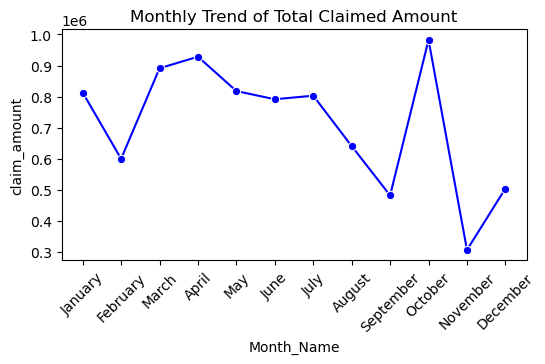

In [141]:
plt.figure(figsize=(6,3))
sns.lineplot(x=monthly_claims['Month_Name'], y=monthly_claims['claim_amount'],marker='o',color='b')
plt.title("Monthly Trend of Total Claimed Amount")
plt.xticks(rotation=45) 
plt.show()

In [142]:
#15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that
# represents fraudulent claims and the other for non-fraudulent claims.


In [143]:
mergedf.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'Age', 'Agegroup', 'Month_Num', 'Month_Name'],
      dtype='object')

In [144]:
avg_claim_amt=mergedf.groupby(['gender','Agegroup','fraudulent'])['claim_amount'].mean().reset_index()
avg_claim_amt

,gender,Agegroup,fraudulent,claim_amount
0,Female,18-25,No,12776.934436
1,Female,18-25,Yes,9114.333051
2,Female,26-30,No,12011.836735
3,Female,26-30,Yes,5635.000000
4,Female,31-35,No,13256.688823
5,Female,31-35,Yes,14585.428254
6,Female,36-40,No,11643.548962
7,Female,36-40,Yes,16934.894659
8,Female,41-43,No,10102.380952
9,Female,41-43,Yes,19909.950000


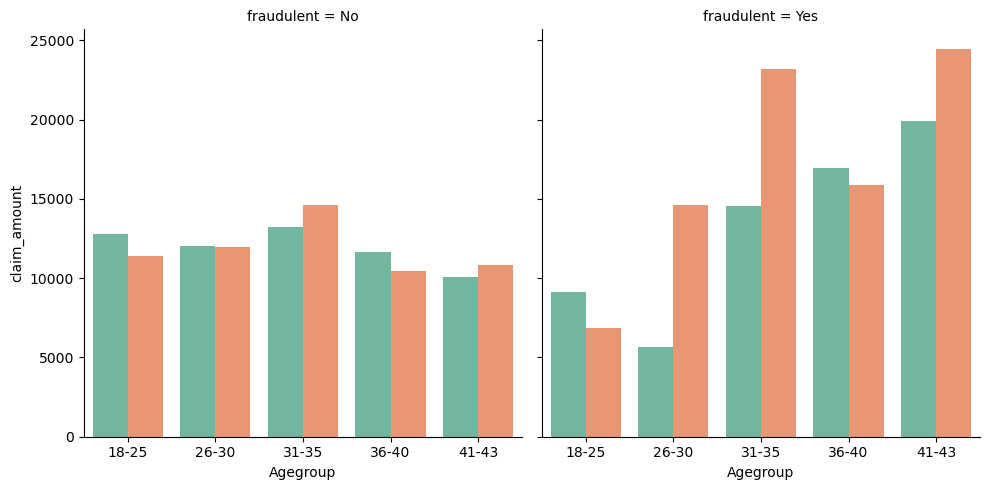

In [145]:
g = sns.FacetGrid(avg_claim_amt, col="fraudulent", height=5, sharey=True)

# Use barplot inside FacetGrid
g.map_dataframe(sns.barplot, x="Agegroup", y="claim_amount", hue="gender", palette="Set2", errorbar=None)